## 7.1 Test on Playoff Season Dataset

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay
import joblib
from plot_metrics import *
from matplotlib.gridspec import GridSpec
import pickle

In [2]:
# Read in data and assign X and y
data = pd.read_csv('../data/test_playoff.csv', index_col=0)
#data = pd.read_csv('../data/test_regular.csv', index_col=0)
data

,time,period,coordinateX,coordinateY,shotDistance,shotAngle,shotType,emptyNet,lastEventType,lastCoordinateX,lastCoordinateY,lastTime,lastShotDistance,rebound,changeShotAngle,speed,friendlyPlayersOnIce,opposingPlayersOnIce,timeSincePP,isGoal
gameId,,,,,,,,,,,,,,,,,,,,
2019030001,54,1,-44.0,20.0,134.4954,8.5518,6,0,4,99.0,-5.0,9,145.1689,0,0.0000,16.1299,5,5,0,0
2019030001,190,1,-57.0,-10.0,146.3421,-3.9182,3,0,1,-69.0,22.0,23,34.1760,0,0.0000,1.4859,5,5,0,0
2019030001,199,1,-30.0,35.0,124.0403,16.3895,2,0,2,-38.0,37.0,1,8.2462,0,0.0000,8.2462,5,5,0,0
2019030001,233,1,16.0,8.0,105.3043,4.3570,6,0,0,-67.0,0.0,8,83.3847,0,0.0000,10.4231,5,5,0,0
2019030001,244,1,-64.0,-15.0,153.7335,-5.5993,6,0,9,16.0,8.0,11,83.2406,1,-11.8533,7.5673,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019030416,3361,3,-59.0,-24.0,149.9333,-9.2110,3,0,2,64.0,-26.0,3,123.0163,0,0.0000,41.0054,4,5,34,0
2019030416,3440,3,-81.0,3.0,170.0265,1.0110,6,0,0,-80.0,6.0,2,3.1623,0,0.0000,1.5812,4,5,113,0
2019030416,3530,3,34.0,-6.0,123.1463,-2.7927,3,0,11,92.0,-16.0,8,58.8558,0,0.0000,7.3570,5,5,0,0


In [3]:
X_test = data[data.columns.tolist()[:-1]]
y_test = data[['isGoal']]
X_test

,time,period,coordinateX,coordinateY,shotDistance,shotAngle,shotType,emptyNet,lastEventType,lastCoordinateX,lastCoordinateY,lastTime,lastShotDistance,rebound,changeShotAngle,speed,friendlyPlayersOnIce,opposingPlayersOnIce,timeSincePP
gameId,,,,,,,,,,,,,,,,,,,
2019030001,54,1,-44.0,20.0,134.4954,8.5518,6,0,4,99.0,-5.0,9,145.1689,0,0.0000,16.1299,5,5,0
2019030001,190,1,-57.0,-10.0,146.3421,-3.9182,3,0,1,-69.0,22.0,23,34.1760,0,0.0000,1.4859,5,5,0
2019030001,199,1,-30.0,35.0,124.0403,16.3895,2,0,2,-38.0,37.0,1,8.2462,0,0.0000,8.2462,5,5,0
2019030001,233,1,16.0,8.0,105.3043,4.3570,6,0,0,-67.0,0.0,8,83.3847,0,0.0000,10.4231,5,5,0
2019030001,244,1,-64.0,-15.0,153.7335,-5.5993,6,0,9,16.0,8.0,11,83.2406,1,-11.8533,7.5673,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019030416,3361,3,-59.0,-24.0,149.9333,-9.2110,3,0,2,64.0,-26.0,3,123.0163,0,0.0000,41.0054,4,5,34
2019030416,3440,3,-81.0,3.0,170.0265,1.0110,6,0,0,-80.0,6.0,2,3.1623,0,0.0000,1.5812,4,5,113
2019030416,3530,3,34.0,-6.0,123.1463,-2.7927,3,0,11,92.0,-16.0,8,58.8558,0,0.0000,7.3570,5,5,0


In [4]:
y_test = data[['isGoal']]
y_test

,isGoal
gameId,
2019030001,0
2019030001,0
2019030001,0
2019030001,0
2019030001,0
...,...
2019030416,0
2019030416,0
2019030416,0


In [5]:
def pred_model(X_test, y_test, model, folder=""):
    if model == 'LR_D':
        best_model = joblib.load(folder + "log_reg_basemodel_distance.pkl")
        X_test = X_test.rename({'shotDistance': 'distanceFromNet', 'shotAngle': 'angleFromNet'}, axis=1)
        X_test = X_test[['distanceFromNet']]
        
    elif model == 'LR_A':
        best_model = joblib.load(folder + "log_reg_basemodel_angle.pkl")
        X_test = X_test.rename({'shotDistance': 'distanceFromNet', 'shotAngle': 'angleFromNet'}, axis=1)
        X_test = X_test[['angleFromNet']]
        
    elif model == 'LR_DA':
        best_model = joblib.load(folder + "log_reg_basemodel_distance_angle.pkl")
        X_test = X_test.rename({'shotDistance': 'distanceFromNet', 'shotAngle': 'angleFromNet'}, axis=1)
        X_test = X_test[['distanceFromNet', 'angleFromNet']]
        
    elif model == 'XGB':
        best_model = joblib.load(folder + "xgb_all_features_grid_search1.pkl")
       
    elif model == 'RF':
        best_model = joblib.load(folder + "rf_random_best_model.pkl")
        
    elif model == 'DT':
        best_model = joblib.load(folder + "dt_random_best_model.pkl") 
 
    elif model == 'SVM':
        best_model = joblib.load(folder + "svm_best_prob.pkl")
           
    else:
        pass 
    
    y_pred = best_model.predict(X_test)
    
    #Probability estimates
    pred_probs = best_model.predict_proba(X_test)
    probs_isgoal = pred_probs[:,1]
    
    #Model Evaultion Metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    #precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    cf_matrix = metrics.confusion_matrix(y_test,y_pred)
    roc_auc = metrics.roc_auc_score(y_test,probs_isgoal)
    
    #print(f' accuracy: {accuracy}')
    #print(f' f1_score: {f1_score}')
    #print(f' precision: {precision}')
    #print(f' recall: {recall}')
    #print(f' roc_auc: {roc_auc}')
    #print('Confusion Matrix')
    #print(cf_matrix)
    
                                
    return y_test, y_pred, accuracy, pred_probs

In [9]:
def plot_roc_all_feat(X_test, y_test):

    fig = plt.figure(figsize=(12,10))
    
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT', "NN", "SVM"] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan', "orange", "yellow"]
    #plot_label_list = ['LR_Distance', 'LR_AngleAngle from Net', 'Distance and Angle from Net', ]
    
    for i, model in enumerate(model_list):
        print(model)
        
        if model != "NN":
            y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model, "../model/")
            probs_isgoal = pred_probs[:,1]
            fpr, tpr, _ = roc_curve(y_test,probs_isgoal)
        else:
            file = open("../6_Different_Models/NN/results_nn_playoff.pkl",'rb')
            res = pickle.load(file)
            file.close()
            fpr, tpr, _ = roc_curve(y_test, res["y_"])
        roc_auc = auc(fpr,tpr)
        
            
        plot_color = model_color_list[i]
        plot_label = model_list[i]

            
        plt.plot(fpr, tpr, color = plot_color, label = f'{plot_label} '+'AUC = %0.2f' % roc_auc, lw=2)               
    
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    plt.title('ROC Curves', fontsize=20)
    plt.legend(loc=2,prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)    
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'7-2-2a_ROC_curves.png')
    plt.show()

LR_D
LR_A
LR_DA
XGB


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. Thi

RF


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.

DT
NN
SVM


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


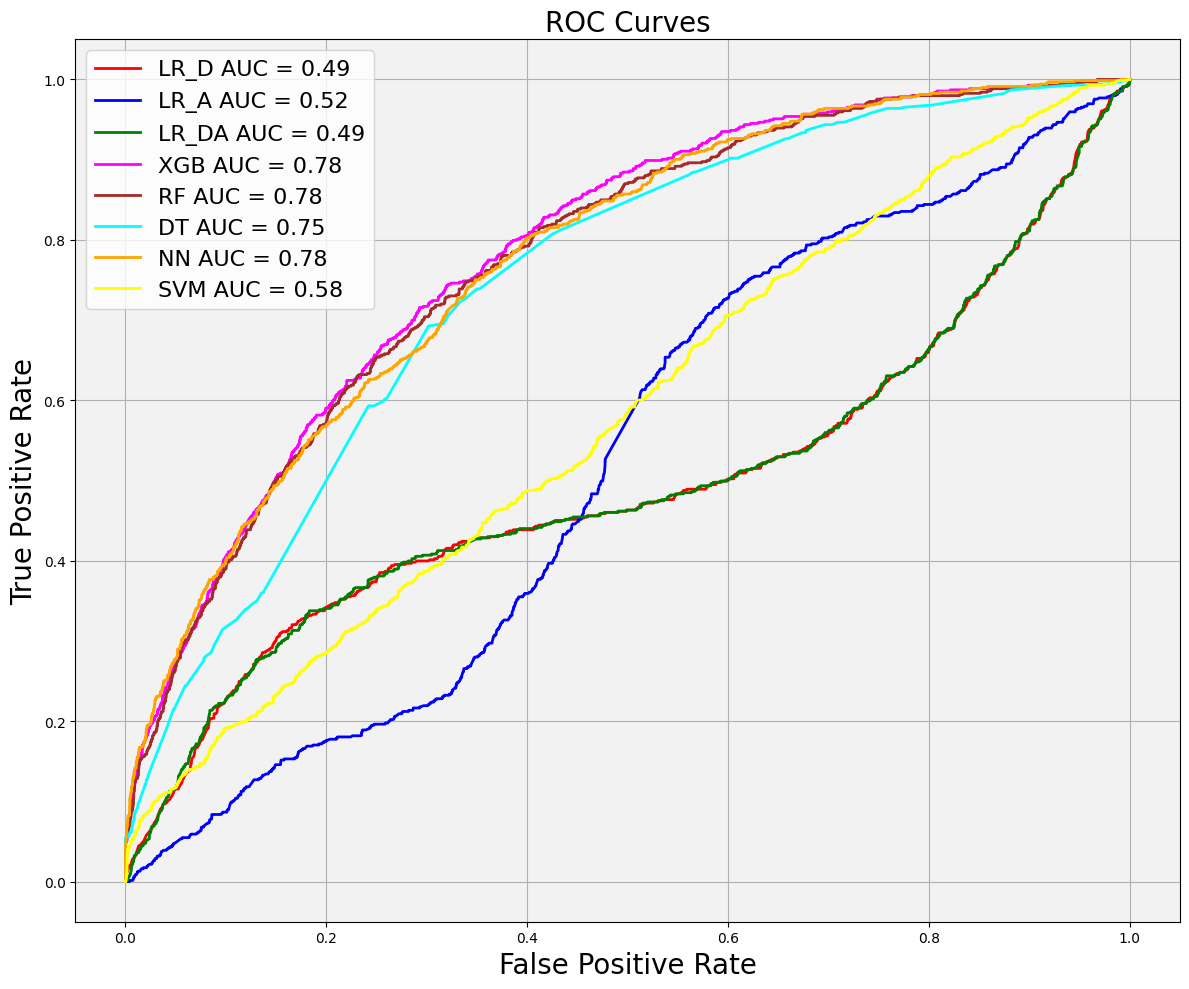

In [10]:
plot_roc_all_feat(X_test, y_test)

In [17]:
def plot_goal_rate_all_feat(X_test, y_test):  
    fig = plt.figure(figsize=(12,10))
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT', "NN", "SVM"] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan', "orange", "yellow"]
    
    for i, model in enumerate(model_list):
        print(model)
        if model != "NN":
            y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model, "../model/")  
            df_percentile =  calc_percentile(pred_probs, y_test)
        else:
            file = open("../6_Different_Models/NN/results_nn_playoff.pkl",'rb')
            res = pickle.load(file)
            file.close()
            df_percentile = calc_percentile(res["pred_probs"], y_test)
            
        goal_rate_df = goal_rate(df_percentile)
        goal_rate_x = goal_rate_df['Percentile']
        goal_rate_y = goal_rate_df['Rate']

        plot_color = model_color_list[i]
        plot_label = model_list[i]
        plt.plot(goal_rate_x,goal_rate_y, color = plot_color, label = f'{plot_label}' )
                 
       
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    ax.set_ylim([0,100])
    ax.set_xlim([0,100])
    ax.invert_xaxis()
    major_ticks = np.arange(0, 110, 10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    
    plt.grid(True)
    plt.title('Goal Rate', fontsize=20)
    plt.xlabel('Shot probability model percentile', fontsize=16)
    plt.ylabel('Goals / (Shots+Goals)%', fontsize=16)
    plt.legend(loc=2,prop={'size': 16})
    plt.tight_layout()
    plt.savefig(f'7-2-2b_goal_rates.png')
    plt.show()

LR_D
LR_A
LR_DA
XGB


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. Thi

RF


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.

DT
NN
SVM


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


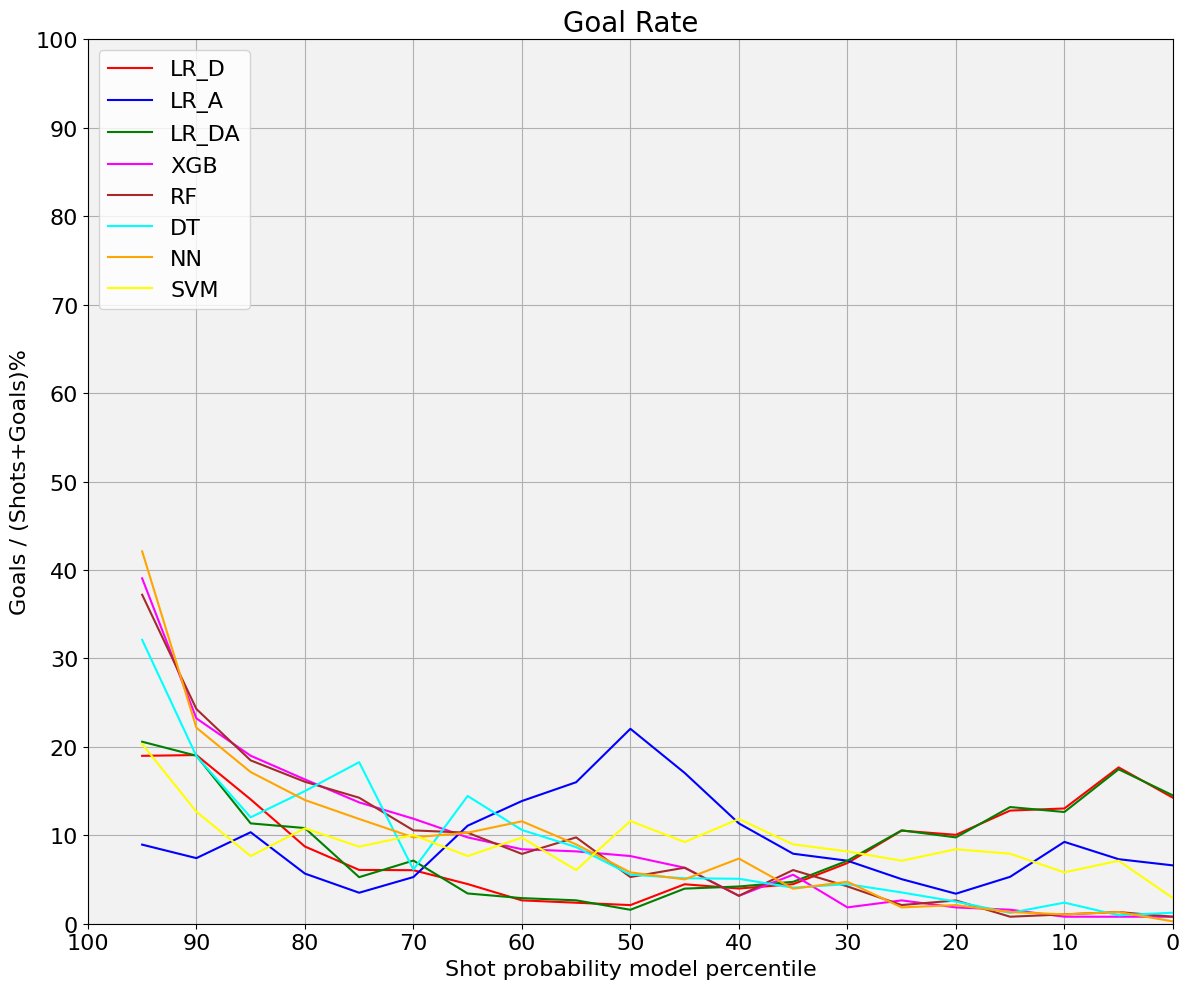

In [18]:
plot_goal_rate_all_feat(X_test, y_test)

In [19]:
def plot_cumulative_rate_all_feat(X_test, y_test):

    fig = plt.figure(figsize=(12,10))
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT', "NN", "SVM"] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan', "orange", "yellow"]
    
    for i, model in enumerate(model_list):
        print(model)
        if model != "NN":
            y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model, "../model/") 
            df_percentile = calc_percentile(pred_probs, y_test)
        else:
            file = open("../6_Different_Models/NN/results_nn_playoff.pkl",'rb')
            res = pickle.load(file)
            file.close()
            df_percentile = calc_percentile(res["pred_probs"], y_test)            
            
        df_precentile_only_goal = df_percentile[df_percentile['isGoal'] == 1]

        plot_color = model_color_list[i]
        plot_label = model_list[i]
        ax = sns.ecdfplot(data=df_precentile_only_goal, x=100 - df_precentile_only_goal.Percentile, 
                              color=plot_color)
            
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.xticks(np.arange(0, 100 * 1.01, 10))
    xvals = ax.get_xticks()
    ax.set_xticklabels(100 - xvals.astype(np.int32), fontsize=16)
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in yvals], fontsize=16)
    ax.set_xlabel('Shot probability model percentile', fontsize=16)
    ax.set_ylabel('Proportion', fontsize=16)
    ax.set_title(f"Cumulative % of Goals", fontsize=20)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    
    plt.legend(labels=model_list, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'7-2-2c_goal_proportions.png')
    plt.show()

LR_D
LR_A
LR_DA
XGB


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. Thi

RF


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.

DT
NN
SVM


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


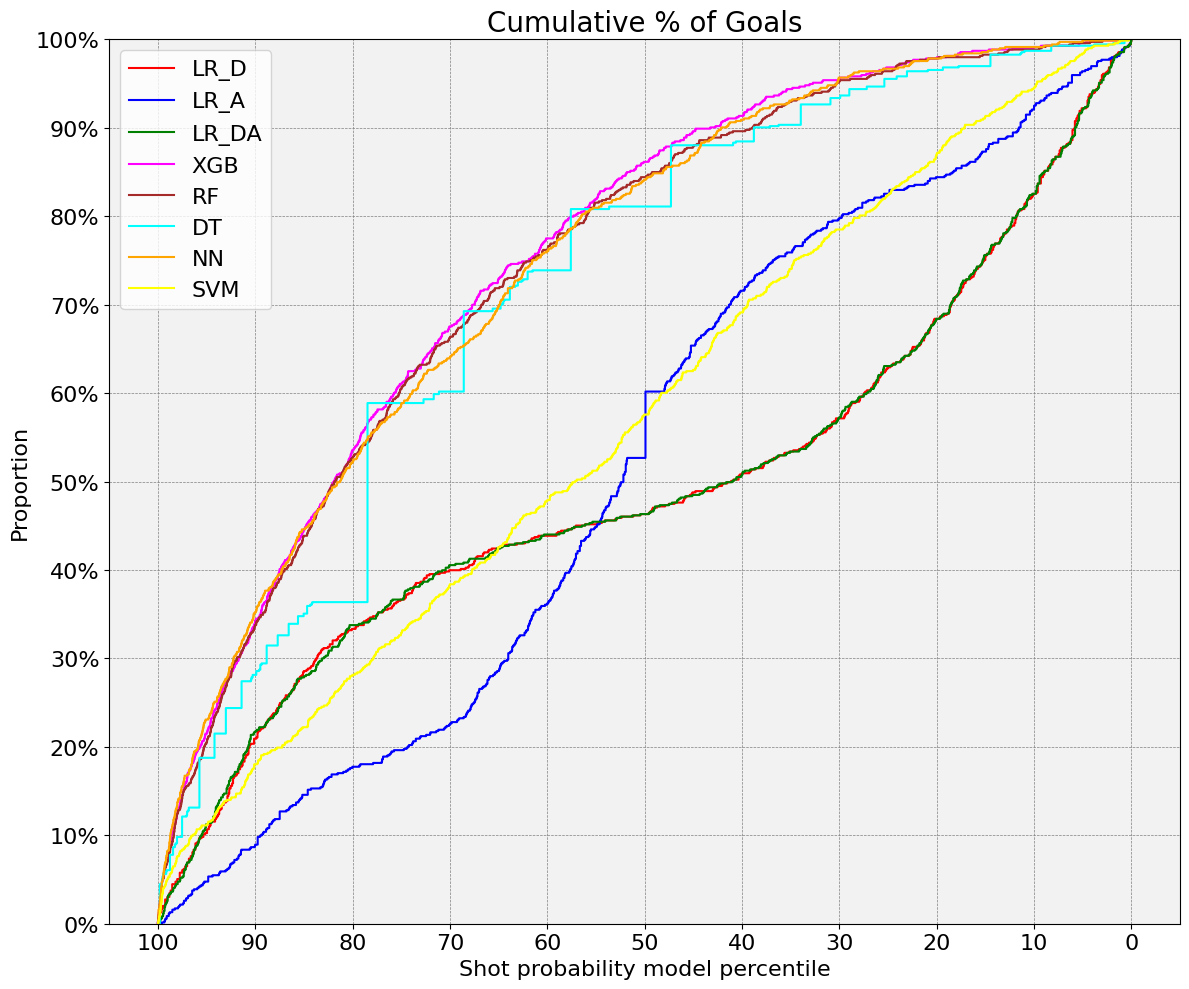

In [20]:
plot_cumulative_rate_all_feat(X_test, y_test)

In [21]:
def plot_calibration_all_feat(X_test, y_test):

    fig = plt.figure(figsize=(20, 20))
    gs = GridSpec(4, 3)

    ax_calibration_curve = fig.add_subplot(gs[:2, :2])
    
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT', "NN", "SVM"] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan', "orange", "yellow"]
    
    for i, model in enumerate(model_list):
        print(model)
        if model != "NN":
            y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model, "../model/")
            y_test_is_goal = y_test['isGoal']
            probs_isgoal = pred_probs[:,1]
        else:
            file = open("../6_Different_Models/NN/results_nn_playoff.pkl",'rb')
            res = pickle.load(file)
            file.close()
            probs_isgoal = res["y_"]
            
        plot_color = model_color_list[i]
        plot_label = model_list[i]    
        ax_display = CalibrationDisplay.from_predictions(y_test_is_goal,probs_isgoal, n_bins=50, 
                                                             ax=ax_calibration_curve, color=plot_color, label=plot_label)
   

    ax = plt.gca()
    ax.set_facecolor('0.95')
    ax_calibration_curve.grid()
    
    plt.title("Calibration plots", fontsize=20)
    plt.legend(loc=2,prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.ylabel('Fraction of positives', fontsize=20)
    plt.xlabel('Mean predicted probability', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'7-2-2d_calibration_plots.png')
    plt.show()

In [22]:
plot_calibration_all_feat(X_test, y_test)

LR_D
LR_A
LR_DA
XGB


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. Thi

RF


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.

DT
NN
SVM


/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llara/miniconda/envs/mila/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
